1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training Loop:
     - forward pass: compute gradient
     - backward pass: gradients
     - update weights

In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [22]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
input_size = n_features
output_size = 1

# precision for loss loss
EPS = 1e-09

epoch 1: w = 1.640, loss = 5702.26513672
epoch 11: w = 13.539, loss = 4223.32812500
epoch 21: w = 23.677, loss = 3154.43847656
epoch 31: w = 32.315, loss = 2381.01977539
epoch 41: w = 39.678, loss = 1820.79956055
epoch 51: w = 45.955, loss = 1414.60754395
epoch 61: w = 51.307, loss = 1119.82653809
epoch 71: w = 55.872, loss = 905.71856689
epoch 81: w = 59.765, loss = 750.08471680
epoch 91: w = 63.086, loss = 636.87469482


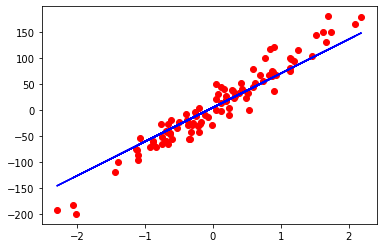

In [23]:
# 1) Model
learning_rate = 0.01
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_iters = 100
# 3) Training loop
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss 
    l = loss(y_pred, y)
    
    # gradients = backward pass
    l.backward() # dLoss/dw
    
    # update weights
    optimizer.step()
    
    # remember to empty gradients for next calculation
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l.item():.8f}')
    
    # break if loss is too small that it's negligible
    if l < EPS:
        break

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()